In [847]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [848]:
# pd.set_option('display.max_colwidth',-1)
pd.set_option('display.max_columns', 100)

Собранные данные

In [849]:
df = pd.read_csv('dataNEW.csv')
df.head()

,Price,Address,Metro,Summary,General Information,Building Information,Price per meter
0,135 000 000 ₽,"Москва, ЦАО, р-н Басманный, ул. Покровка, 45С4",Красные ворота,"150 м²;Общая;89,5 м²;Жилая;15,5 м²;Кухня;3 из ...",Тип жилья;Вторичка;Планировка;Изолированная;Пл...,Год постройки;1906;Строительная серия;Индивиду...,900 000 ₽/м²
1,33 900 000 ₽,"Москва, ЦАО, р-н Хамовники, ул. Тимура Фрунзе, 20",Парк Культуры,"53,3 м²;Общая;5 из 5;Этаж;1907;Построен",Тип жилья;Вторичка;Планировка;Смежно-изолирова...,Год постройки;1907;Тип дома;Кирпичный;Тип пере...,636 023 ₽/м²
2,38 000 000 ₽,"Москва, ЦАО, р-н Тверской, Долгоруковская ул., 35",Новослободская,"101,4 м²;Общая;75,8 м²;Жилая;10,1 м²;Кухня;4 и...",Тип жилья;Вторичка;Планировка;Изолированная;Пл...,Год постройки;1906;Тип дома;Кирпичный;Тип пере...,374 753 ₽/м²
3,36 500 000 ₽,"Москва, ЗАО, р-н Дорогомилово, Кутузовский про...",Студенческая,62 м²;Общая;11 м²;Кухня;7 из 8;Этаж;1937;Построен,Тип жилья;Вторичка;Планировка;Изолированная;Пл...,Год постройки;1937;Тип дома;Кирпичный;Тип пере...,588 710 ₽/м²
4,10 178 000 ₽,"Москва, ЦАО, р-н Таганский, ул. Воронцово Поле...",Чкаловская,"29,19 м²;Общая;16,7 м²;Жилая;2 из 4;Этаж",Тип жилья;Вторичка Апартаменты;Санузел;1 совме...,Тип дома;Кирпичный,348 681 ₽/м²


Обработка сырых данных

In [850]:
df['Price'] = df['Price'].str.replace('₽','')

df[['City', 'Okrug','District', 'Street', 'Building','Building Part','Building Part2']] = (
    df['Address']
    .str
    .split(',', expand=True)
)
df = df.drop(['Address','City','Street','Building', 'Building Part','Building Part2'], axis=1)

In [851]:
SummaryDF = pd.DataFrame()
for row in df['Summary']:
    dictionary = {}
    rowList = row.split(';')
    for i in range(1, len(rowList), 2):
        dictionary[rowList[i]] = rowList[i-1]
    SummaryDF = pd.concat([SummaryDF, pd.DataFrame(dictionary, index=[0])], ignore_index=True)
SummaryDF.head()

df = pd.concat([df, SummaryDF], axis=1)
df = df.drop('Summary', axis=1)

In [852]:
GeneralInformationDF = pd.DataFrame()
for row in df['General Information']:
    dictionary = {}
    try:
        rowList = row.split(';')
        for i in range(1, len(rowList), 2):
            dictionary[rowList[i-1]] = rowList[i]
    except Exception:
        pass
    finally:
        GeneralInformationDF = pd.concat([GeneralInformationDF, pd.DataFrame(dictionary, index=[0])], ignore_index=True)
GeneralInformationDF.head()

df = pd.concat([df, GeneralInformationDF], axis=1)
df = df.drop('General Information', axis=1)

In [853]:
BuildingInformationDF = pd.DataFrame()
for row in df['Building Information']:
    dictionary = {}
    try:
        rowList = row.split(';')
        for i in range(1, len(rowList), 2):
            dictionary[rowList[i-1]] = rowList[i]
    except Exception:
        pass
    finally:
        BuildingInformationDF = pd.concat([BuildingInformationDF, pd.DataFrame(dictionary, index=[0])], ignore_index=True)
BuildingInformationDF.head()

df = pd.concat([df, BuildingInformationDF], axis=1)
df = df.drop('Building Information', axis=1)

In [854]:
import re

def getValueFromString(s):
    if (pd.isnull(s)):
        return np.nan
    value = re.findall('\d+\,*\d*', s)[0]
    value = float(value.replace(',','.'))
    return value

In [855]:
df['Общая'] = df['Общая'].apply(getValueFromString)
df['Жилая'] = df['Жилая'].apply(getValueFromString)
df['Кухня'] = df['Кухня'].apply(getValueFromString)
df['Высота потолков'] = df['Высота потолков'].apply(getValueFromString)
df['Кол-во корпусов'] = df['Кол-во корпусов'].apply(getValueFromString)
df['Price per meter'] = df['Price per meter'].apply(getValueFromString)

In [856]:
df[['Этаж квартиры', 'Всего этажей']] = (
    df['Этаж']
    .str
    .split(' из ', expand=True)
)
df = df.drop('Этаж', axis=1)

In [857]:
df['Price'] = df['Price'].str.replace(' ','').astype(float)
df['Подъезды'] = df['Подъезды'].str.replace(' ','').astype(float)
df['Этаж квартиры'] = df['Этаж квартиры'].str.replace(' ','').astype(float)
df['Всего этажей'] = df['Всего этажей'].str.replace(' ','').astype(float)

In [858]:
df.isnull().sum()

Price                    0
Metro                  159
Price per meter          0
Okrug                    0
District                 0
Общая                    0
Жилая                 1911
Кухня                 1479
Построен              2918
Сдан                  5314
Срок сдачи            3955
Отделка               3991
Тип жилья              192
Планировка            3628
Площадь комнат        3377
Высота потолков       2028
Санузел               1465
Ремонт                2050
Вид из окон           1936
Балкон/лоджия         3730
Отделка               4229
Год постройки         2520
Строительная серия    4552
Тип дома               996
Тип перекрытий        3278
Подъезды              3046
Лифты                 2670
Отопление             3213
Аварийность           2502
Парковка              2336
Мусоропровод          4056
Газоснабжение         4650
Сдача комплекса       4079
Застройщик            4079
Класс                 4079
Кол-во корпусов       4079
Отделка               4079
Э

In [859]:
df = df[['Price', 'Тип жилья','Общая','Кухня','Жилая','Price per meter']]

In [860]:
df.sample(10)

,Price,Тип жилья,Общая,Кухня,Жилая,Price per meter
725,30490000.0,Вторичка,51.0,14.5,30.3,597.0
4384,179437598.0,Новостройка Апартаменты,190.4,NaN,NaN,942.0
1447,59763319.0,Новостройка,98.6,NaN,NaN,606.0
5141,18848835.0,Новостройка,57.3,19.2,26.6,328.0
1530,56000000.0,Вторичка,90.0,12.0,45.0,622.0
1085,34950000.0,Вторичка,100.3,10.0,63.8,348.0
2842,16000000.0,Вторичка,47.8,7.3,31.2,334.0
942,13200000.0,Вторичка,43.8,6.0,34.0,301.0
4276,369000000.0,Вторичка Пентхаус,260.0,25.0,155.0,1.0
2110,25278480.0,Новостройка Апартаменты,48.0,NaN,17.2,526.0


In [861]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5577 entries, 0 to 5576
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            5577 non-null   float64
 1   Тип жилья        5385 non-null   object 
 2   Общая            5577 non-null   float64
 3   Кухня            4098 non-null   float64
 4   Жилая            3666 non-null   float64
 5   Price per meter  5577 non-null   float64
dtypes: float64(5), object(1)
memory usage: 261.5+ KB


<AxesSubplot:>

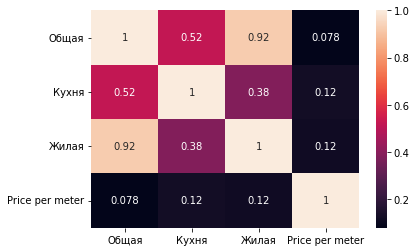

In [862]:
sns.heatmap(df.drop('Price',axis=1).corr(), annot=True)

Обработка NaN Значений

In [863]:
df_cat = list(df.select_dtypes(include=['object','bool']).columns)
df_num = list(df.select_dtypes(include=['float64','int64']).columns)
print("Categorical: ", df_cat)
print("Numeric", df_num)

Categorical:  ['Тип жилья']
Numeric ['Price', 'Общая', 'Кухня', 'Жилая', 'Price per meter']


In [864]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

imputer = SimpleImputer(strategy='median')
df_num_imputed = pd.DataFrame(imputer.fit_transform(df[df_num]), columns= df[df_num].columns)

df_num_imputed = pd.DataFrame(MinMaxScaler().fit_transform(df_num_imputed), columns=df_num_imputed.columns)
df_cat_encoded = pd.get_dummies(df[df_cat])


df_num_imputed.reset_index(drop=True, inplace=True)
df_cat_encoded.reset_index(drop=True, inplace=True)

y = df_num_imputed.pop('Price')
X = pd.concat([df_cat_encoded, df_num_imputed], axis=1)

In [865]:
X.sample(10)

,Тип жилья_Вторичка,Тип жилья_Вторичка Апартаменты,Тип жилья_Вторичка Пентхаус,Тип жилья_Новостройка,Тип жилья_Новостройка Апартаменты,Тип жилья_Новостройка Пентхаус,Общая,Кухня,Жилая,Price per meter
4681,0,0,0,1,0,0,0.059158,0.030303,0.061189,0.216433
3113,1,0,0,0,0,0,0.037789,0.076768,0.024883,0.299599
4049,0,0,0,1,0,0,0.033474,0.148485,0.013615,0.236473
5469,0,0,0,1,0,0,0.093895,0.093939,0.048513,0.450902
221,1,0,0,0,0,0,0.050632,0.093939,0.048513,0.440882
5381,0,0,0,0,1,0,0.050463,0.040404,0.042254,0.676353
5420,0,0,0,1,0,0,0.118842,0.332323,0.048513,0.320641
4534,1,0,0,0,0,0,0.069474,0.144444,0.049452,0.204409
1450,0,1,0,0,0,0,0.063474,0.093939,0.048513,0.800601
470,1,0,0,0,0,0,0.196842,0.093939,0.048513,0.899800


Линейная регрессия

In [866]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [867]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6790831650337104

In [868]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
predictions = model.predict(X_test)

In [869]:
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.genmod.generalized_linear_model import pred
print("MAE: ", mean_absolute_error(predictions, y_test))
print("R2 Score: ", r2_score(predictions, y_test))

MAE:  0.013723720714841398
R2 Score:  0.0936005403506125


In [870]:
import statsmodels.api as sm
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)
results = model.fit()
results.params

const                                0.004710
Тип жилья_Вторичка                  -0.008232
Тип жилья_Вторичка Апартаменты      -0.004075
Тип жилья_Вторичка Пентхаус          0.000893
Тип жилья_Новостройка               -0.009357
Тип жилья_Новостройка Апартаменты    0.003882
Тип жилья_Новостройка Пентхаус       0.006318
Общая                                0.455176
Кухня                                0.004923
Жилая                               -0.055784
Price per meter                     -0.028669
dtype: float64

In [871]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     851.1
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:35:02   Log-Likelihood:                 11507.
No. Observations:                5019   AIC:                        -2.299e+04
Df Residuals:                    5008   BIC:                        -2.292e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 